# TP2

In [1]:
import cv2 
import cv2 as cv
import numpy as np 
from matplotlib import pyplot as plt 

In [2]:
path = "vallee.png" 
img = cv2.imread(path,0)

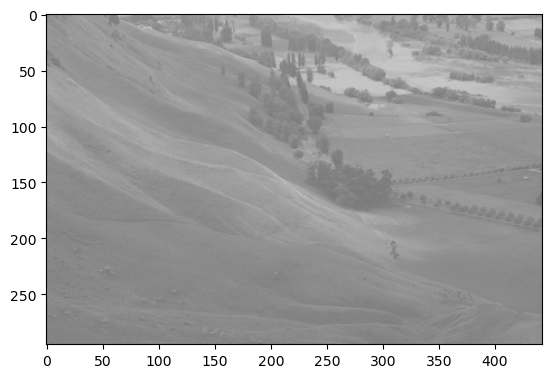

In [3]:
plt.imshow(img,cmap="gray", vmin=0, vmax=255) 
plt.show() 

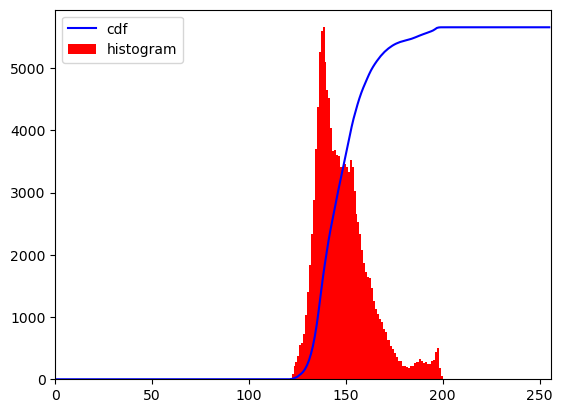

In [4]:
# afficher l'histogramme et la fonction de distribution cumulative (CDF)
hist,bins = np.histogram(img.flatten(),256,[0,256]) 
cdf = hist.cumsum()
#cdf= Cumulative Distribution Function of an image
cdf_normalized = cdf*float(hist.max())/ cdf.max() 
plt.plot(cdf_normalized, color = 'b') 
plt.hist(img.flatten(),256,[0,256], color = 'r') 
plt.xlim([0,256]) 
plt.legend(('cdf','histogram'), loc = 'upper left') 
plt.show() 

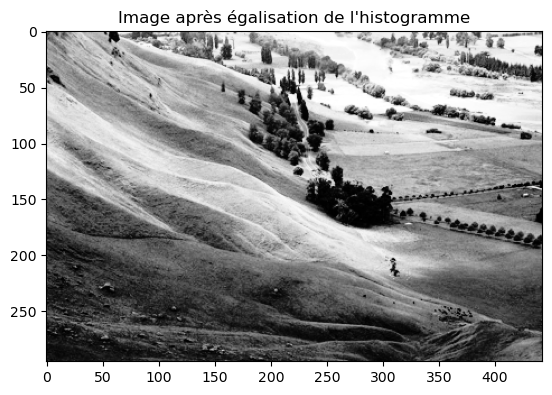

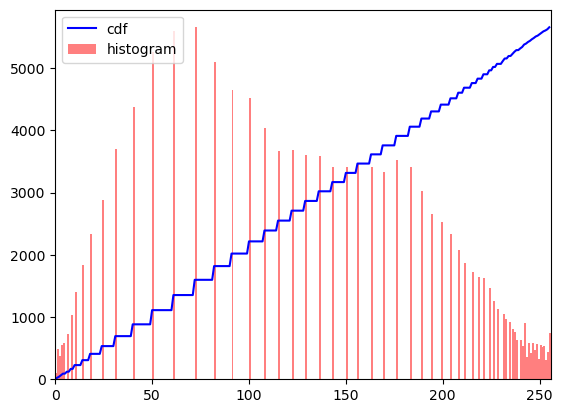

In [5]:
# l'égalisation de l'histogramme à l'image
equ = cv2.equalizeHist(img)
plt.imshow(equ, cmap='gray')
plt.title('Image après égalisation de l\'histogramme')
plt.show()
hist_equ, bins_equ = np.histogram(equ.flatten(), 256, [0, 256])
cdf_equ = hist_equ.cumsum()
cdf_normalized_equ = cdf_equ * hist_equ.max() / cdf_equ.max()

plt.plot(cdf_normalized_equ, color = 'b')
plt.hist(equ.flatten(), 256, [0, 256], color = 'r', alpha=0.5)
plt.xlim([0, 256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

# Adaptive Histogram Equalization (AHE) 


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, exposure, io
from skimage.util import img_as_ubyte
from skimage import morphology as morp
from skimage.filters import rank


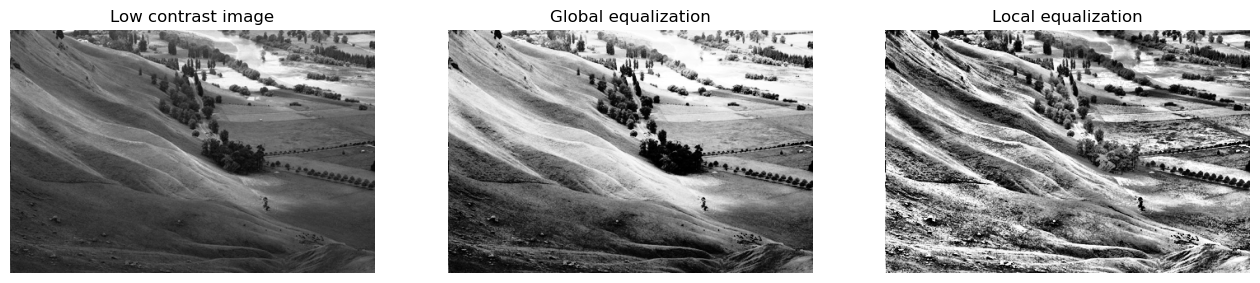

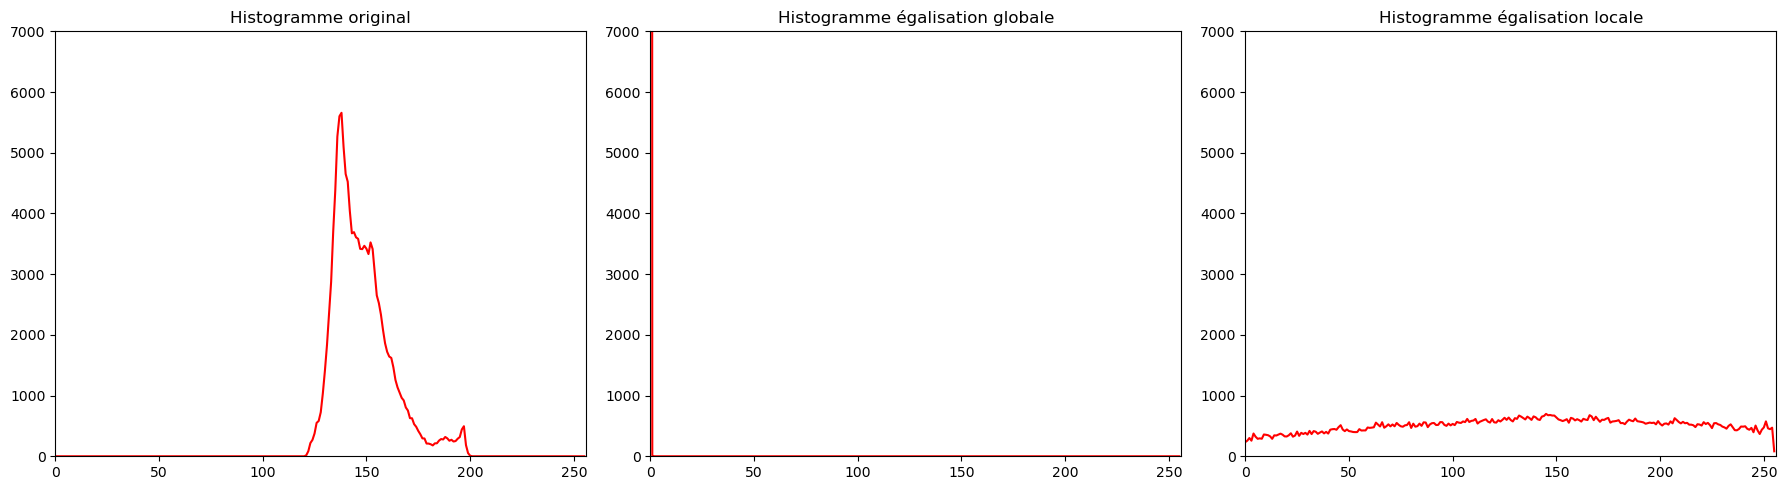

In [7]:
from skimage.io import imread

# Original image  
path = "vallee.png"  
img = img_as_ubyte(imread(path,as_gray=True))  
 
# Global equalize  
img_global = exposure.equalize_hist(img)  
# Local Equalization, disk shape kernel  
# Better contrast with disk kernel but could be different  
kernel = morp.disk(30)  
img_local = rank.equalize(img, footprint=kernel)  
plt.rcParams['figure.figsize'] = [16, 16]  
fig, (ax_img, ax_global, ax_local) = plt.subplots(1, 3)  
ax_img.imshow(img, cmap=plt.cm.gray)  
ax_img.set_title('Low contrast image')  
ax_img.set_axis_off()  
ax_global.imshow(img_global, cmap=plt.cm.gray)  
ax_global.set_title('Global equalization')  
ax_global.set_axis_off()  
ax_local.imshow(img_local, cmap=plt.cm.gray)  
ax_local.set_title('Local equalization')  
ax_local.set_axis_off()  

fig, ax_hist = plt.subplots(1, 3,figsize=(18, 5))


hist_orig, bins_orig = np.histogram(img.flatten(), 256, [0, 256])
ax_hist[0].plot(hist_orig, color='r')
ax_hist[0].set_title('Histogramme original')

hist_global, bins_global = np.histogram(img_global.flatten(), 256, [0, 256])
ax_hist[1].plot(hist_global, color='r')
ax_hist[1].set_title('Histogramme égalisation globale')


hist_local, bins_local = np.histogram(img_local.flatten(), 256, [0, 256])
ax_hist[2].plot(hist_local, color='r')
ax_hist[2].set_title('Histogramme égalisation locale')

for ax in ax_hist:
    ax.set_xlim([0, 256])
    ax.set_ylim([0, 7000])

plt.tight_layout()
plt.show()


# Contrastive Limited Adaptive Equalization

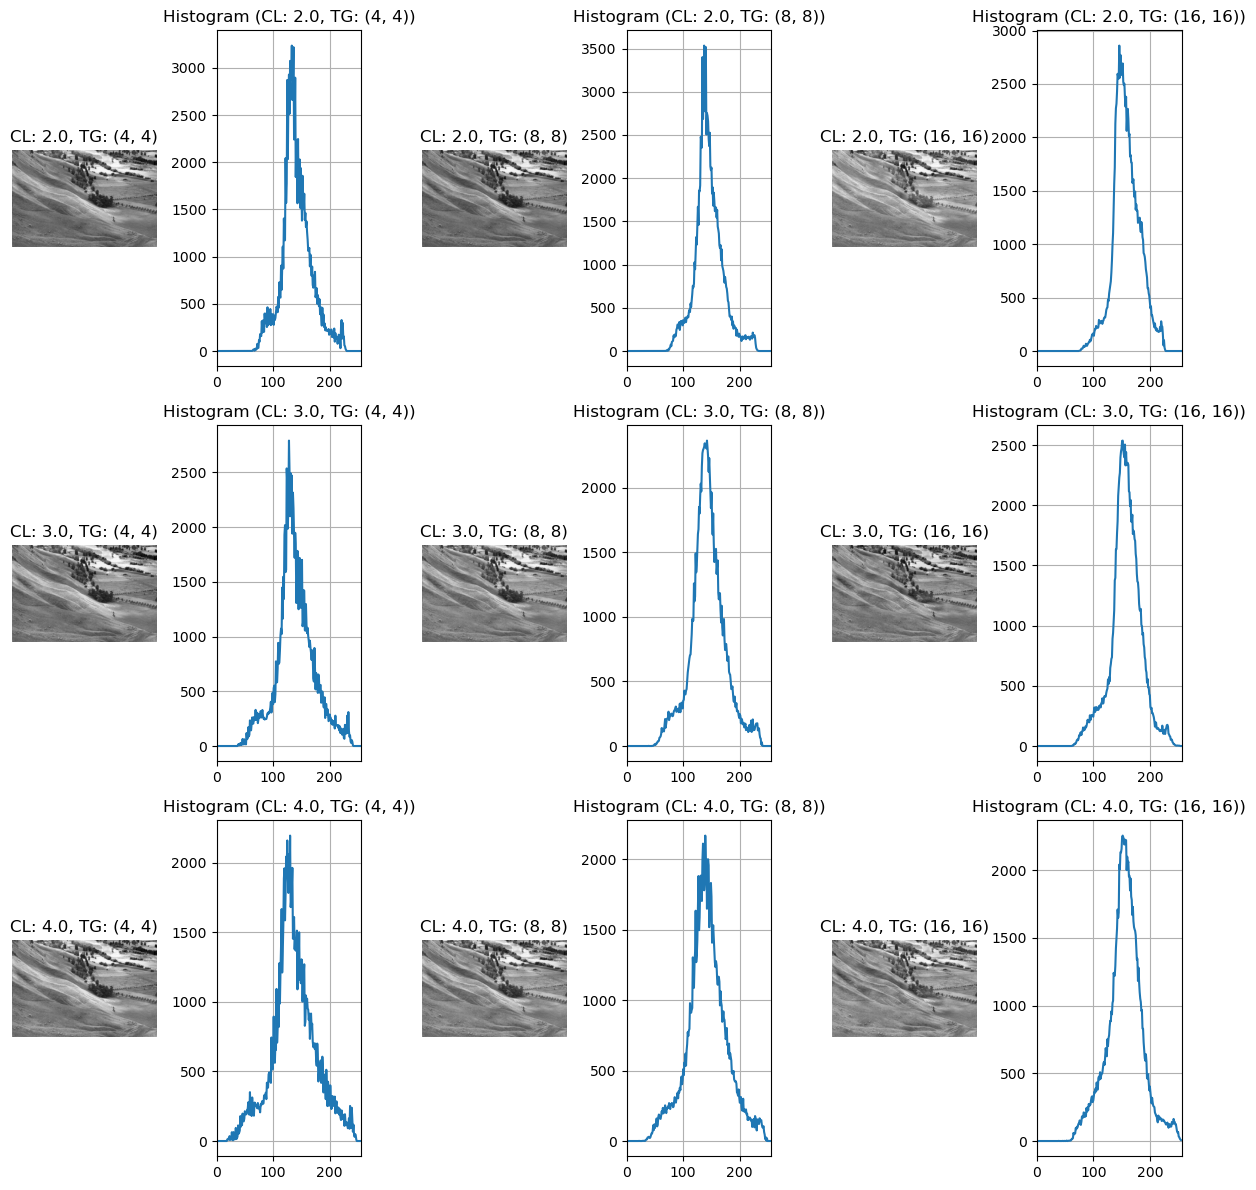

In [8]:
path = "vallee.png"  

img = cv2.imread(path)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Paramètres CLAHE à ajuster
clip_limits = [ 2.0, 3.0, 4.0] 
tile_grid_sizes = [(4,4),(8, 8), (16, 16)] 
# Calculer et afficher les images CLAHE et leurs histogrammes
num_rows = len(clip_limits)
num_cols = len(tile_grid_sizes) * 2  # Multiplier par 2 pour les histogrammes
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, num_rows * 4))

for i, clip_limit in enumerate(clip_limits):
    for j, tile_grid_size in enumerate(tile_grid_sizes):
        # Créer un objet CLAHE avec les paramètres actuels
        clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
        cl_img = clahe.apply(gray_img)

        # Afficher l'image CLAHE
        axs[i, j * 2].imshow(cl_img, cmap='gray')
        axs[i, j * 2].set_title(f'CL: {clip_limit}, TG: {tile_grid_size}')
        axs[i, j * 2].axis('off')

        # Calculer l'histogramme de l'image CLAHE
        hist = cv2.calcHist([cl_img], [0], None, [256], [0, 256])
        axs[i, j * 2 + 1].plot(hist)
        axs[i, j * 2 + 1].set_title(f'Histogram (CL: {clip_limit}, TG: {tile_grid_size})')
        axs[i, j * 2 + 1].set_xlim([0, 256])
        axs[i, j * 2 + 1].grid(True)

plt.tight_layout()
plt.show()

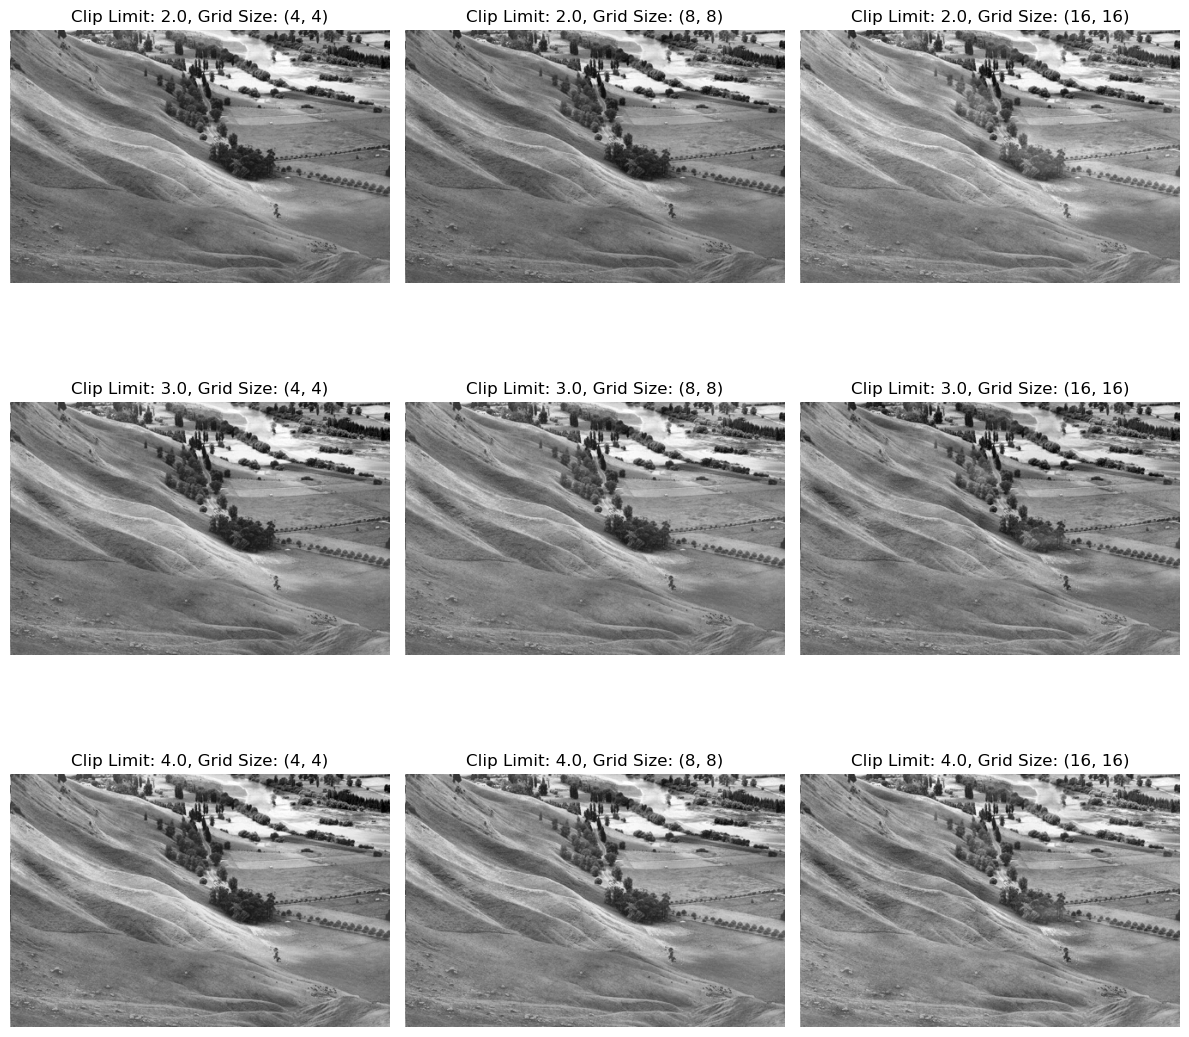

In [9]:
path = "vallee.png"  

img = cv2.imread(path)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Paramètres CLAHE à ajuster
clip_limits = [ 2.0, 3.0, 4.0] 
tile_grid_sizes = [(4,4),(8, 8), (16, 16)] 


fig, axs = plt.subplots(len(clip_limits), len(tile_grid_sizes), figsize=(12, 12))

for i, clip_limit in enumerate(clip_limits):
    for j, tile_grid_size in enumerate(tile_grid_sizes):
      
        clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
        cl_img = clahe.apply(gray_img)
        1
        # Affichage de l'image égalisée
        axs[i, j].imshow(cl_img, cmap='gray')
        axs[i, j].set_title(f'Clip Limit: {clip_limit}, Grid Size: {tile_grid_size}')
        axs[i, j].axis('off')

plt.tight_layout()
plt.show()


# Medical image enhancement based on histogram algorithms

In [10]:
from sklearn.metrics import mean_squared_error
from math import log10, sqrt

## <font color='green'>**Image histogram processing**</font>


In [72]:
path = '2427_left.jpg' 
img = cv.imread(path)
original_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

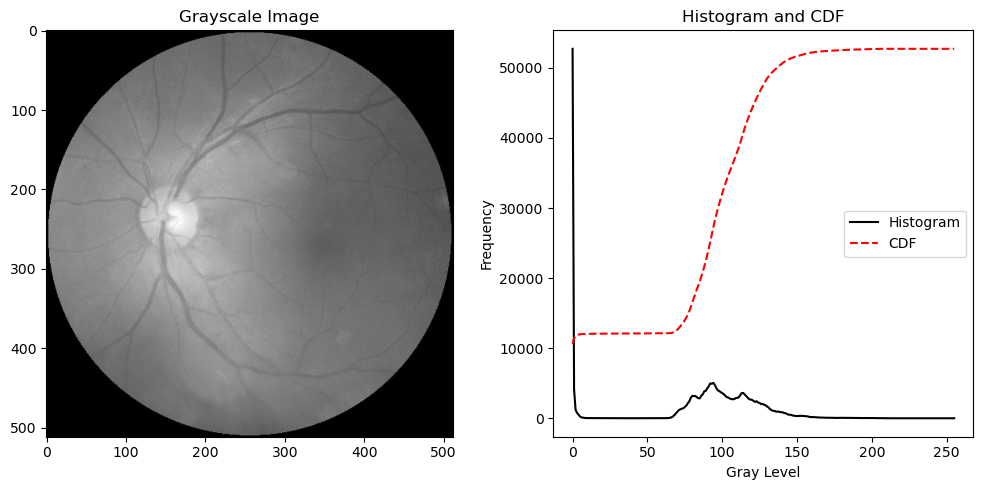

In [73]:
# Calculate the histogram using OpenCV
hist,bins = np.histogram(original_img.flatten(),256,[0,256]) 
cdf = hist.cumsum()
#cdf= Cumulative Distribution Function of an image
cdf_normalized = cdf*float(hist.max())/ cdf.max() 


# Plot the image and its histogram with CDF
plt.figure(figsize=(10, 5))

# Display the image
plt.subplot(1, 2, 1)
plt.imshow(original_img, cmap='gray')
plt.title('Grayscale Image')


# Display the histogram and CDF
plt.subplot(1, 2, 2)
plt.plot(hist, color='black', label='Histogram')
plt.plot(cdf_normalized, color='red', linestyle='--', label='CDF')

plt.title('Histogram and CDF')
plt.xlabel('Gray Level')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()


<font face="Arial">**On remarque d'après l'histogramme de l'image une fréquence élévée de 50000 à un niveau de gris égale à 0, puis diminue jusqu'à un pic de moins de 10000 de fréquence à un niveau de gris égale à 150. Ce pic pourrait indiquer la présence d'une caractéristique particulière dans l'image qui se manifeste par une intensité de gris distincte autour de 150. Il s'agit d'une structure anatomique spécifique.**</font>


## <font color='Green'>**Histogram equalization, HE**</font>

Matrice de l'image originale:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Matrice de l'image égalisée:
[[51.29007339 51.29007339 51.29007339 ... 51.29007339 51.29007339
  51.29007339]
 [51.29007339 51.29007339 51.29007339 ... 51.29007339 51.29007339
  51.29007339]
 [51.29007339 51.29007339 51.29007339 ... 51.29007339 51.29007339
  51.29007339]
 ...
 [51.29007339 51.29007339 51.29007339 ... 51.29007339 51.29007339
  51.29007339]
 [51.29007339 51.29007339 51.29007339 ... 51.29007339 51.29007339
  51.29007339]
 [51.29007339 51.29007339 51.29007339 ... 51.29007339 51.29007339
  51.29007339]]


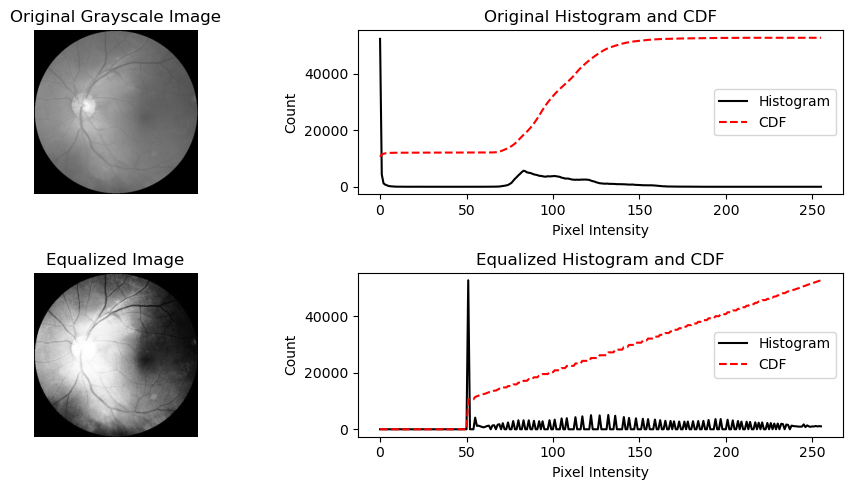

In [74]:
import numpy as np


# Calculate the histogram using OpenCV
def histogram_equalization(image, new_min, new_max):
    # Calcul de l'histogramme
    hist = cv.calcHist([image], [0], None, [256], [0, 256])

    # Calcul de la CDF normalisée
    cdf = hist.cumsum()
    cdf_normalized = cdf / float(cdf.max())
    
    # Application de la transformation HE
    image_he = np.interp(image.flatten(), np.arange(256), cdf_normalized * (new_max - new_min) + new_min)
    image_he = image_he.reshape(image.shape)
    
    return image_he

processed_image_he = histogram_equalization(original_img, 0, 255)
# Calculate the histogram and CDF for the equalized image using numpy
hist_he, bins_he = np.histogram(processed_image_he.flatten(), 256, [0, 255])
cdf_he = hist_he.cumsum()
cdf_he_normalized = cdf_he * float(hist_he.max()) / cdf_he.max()

# Plotting the original image and its histogram with CDF
plt.figure(figsize=(10, 5))

# Display the original image
plt.subplot(2, 2, 1)
plt.imshow(original_img, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

# Display histogram and CDF for the original image
plt.subplot(2, 2, 2)
plt.plot(hist_orig, color='black', label='Histogram')
plt.plot(cdf_normalized, color='red', linestyle='--', label='CDF')
plt.title('Original Histogram and CDF')
plt.xlabel('Pixel Intensity')
plt.ylabel('Count')
plt.legend()

# Display the equalized image
plt.subplot(2, 2, 3)
plt.imshow(processed_image_he, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

# Display histogram and CDF for the equalized image
plt.subplot(2, 2, 4)
plt.plot(hist_he, color='black', label='Histogram')
plt.plot(cdf_he_normalized, color='red', linestyle='--', label='CDF')
plt.title('Equalized Histogram and CDF')
plt.xlabel('Pixel Intensity')
plt.ylabel('Count')
plt.legend()

plt.tight_layout()


print("Matrice de l'image originale:")
print(original_img)

print("\nMatrice de l'image égalisée:")
print(processed_image_he)


In [75]:
def calculate_mse(image_orig, image_eq):
    N, M = image_orig.shape
    mse = np.sum((image_orig - image_eq) ** 2) / (N * M)
    return mse

def calculate_psnr(mse, max_val=255):
    psnr = 10 * np.log10((max_val ** 2) / mse)
    return psnr

def calculate_sd(image_eq):
    sd = np.std(image_eq)
    return sd

#  MSE entre l'image originale et l'image égalisée
mse = calculate_mse(original_img, processed_image_he)

# PSNR
psnr = calculate_psnr(mse)

# la SD de l'image égalisée
sd = calculate_sd(processed_image_he)

print("MSE:", mse)
print("PSNR:", psnr)
print("SD:", sd)

MSE: 3901.0150061738955
PSNR: 12.219027399367949
SD: 66.75294835151377


**Le Mean Square Error (MSE) est une mesure de la différence moyenne au carré entre chaque pixel de l'image originale et de l'image égalisée. Un MSE plus bas indique une meilleure correspondance entre les images. Dans ce cas, le MSE est assez élevé, ce qui suggère une divergence significative entre l'image originale et l'image égalisée.**

**Le Peak Signal to Noise Ratio (PSNR) mesure la qualité de l'image égalisée en comparant le rapport entre l'énergie du signal (c'est-à-dire l'image originale) et l'énergie du bruit (c'est-à-dire la différence entre l'image originale et l'image égalisée). Un PSNR plus élevé indique une meilleure qualité d'image. Cependant, un PSNR de 5.22 est assez faible, suggérant une perte de qualité importante dans l'image égalisée par rapport à l'originale.**

**La Standard Deviation (SD) mesure la variation de l'intensité des pixels dans l'image égalisée. Une SD plus élevée peut indiquer une plus grande diversité des niveaux de gris dans l'image. Dans ce cas, la SD est de 4.95, ce qui signifie que les valeurs des pixels dans l'image égalisée varient en moyenne de près de 5 niveaux de gris par rapport à leur moyenne.**

**En conclusion, les métriques indiquent que l'image égalisée par la méthode HE a un MSE élevé, un PSNR bas et une SD significative, ce qui suggère une altération importante de l'image originale et une perte de qualité dans le processus d'égalisation**

## <font color='Green'>**Cumulative histogram equalization, CHE**</font>

La méthode Cumulative Histogram Equalization (CHE) est une variante de l'égalisation d'histogramme qui vise à étendre les valeurs d'intensité de manière cumulative tout en maintenant un contraste élevé dans l'image. Contrairement à l'égalisation d'histogramme standard qui distribue les intensités de manière uniforme, CHE utilise une fonction de transformation basée sur la CDF accumulée avec une valeur minimale de CDF dans l'image.

Matrice de l'image originale:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Matrice de l'image égalisée:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


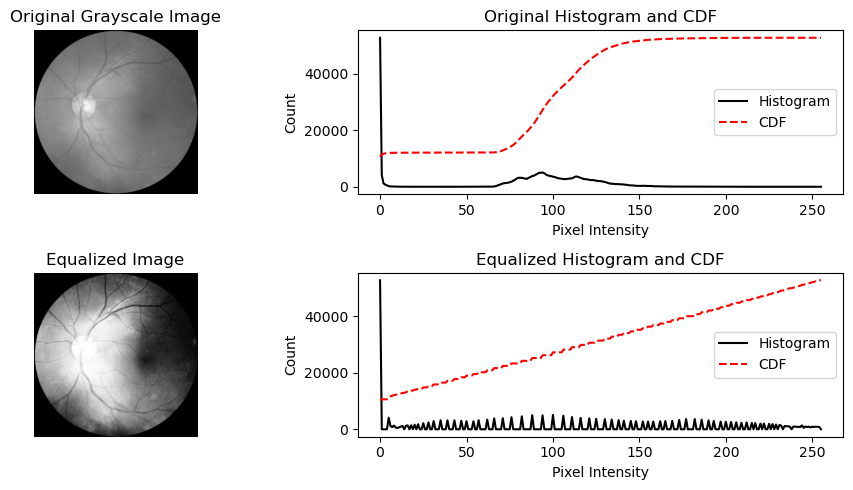

In [76]:
import cv2
import numpy as np
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Function to perform histogram equalization using the cumulative histogram equalization formula
def histogram_equalization(image, new_min, new_max):
    # Calculate the histogram using OpenCV
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    # Calculate the cumulative distribution function (CDF)
    cdf = hist.cumsum()
    # Normalize the CDF
    cdf_normalized = (cdf - cdf.min()) * (new_max - new_min) / (cdf.max() - cdf.min()) + new_min
    # Apply the HE transformation using the normalized CDF
    image_he = np.interp(image.flatten(), np.arange(256), cdf_normalized).astype(np.uint8)
    return image_he.reshape(image.shape)

# Assuming original_img is the original image loaded as a grayscale 8-bit image
# Example usage of the function with the desired new minimum and maximum values:
new_min, new_max = 0, 255  # New range for the pixel values after equalization
processed_image_che = histogram_equalization(original_img, new_min, new_max)

# Original Image Histogram
hist_orig, bins_orig = np.histogram(original_img.flatten(), 256, [0, 256])
cdf_orig = hist_orig.cumsum()

# Equalized Image Histogram
hist_che, bins_che = np.histogram(processed_image_che.flatten(), 256, [0, 256])
cdf_che = hist_che.cumsum()
cdf_che_normalized = cdf_che * float(hist_che.max()) / cdf_che.max()

# Plotting the original image and its histogram with CDF
plt.figure(figsize=(10, 5))

# Display the original image
plt.subplot(2, 2, 1)
plt.imshow(original_img, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

# Display histogram and CDF for the original image
plt.subplot(2, 2, 2)
plt.plot(hist_orig, color='black', label='Histogram')
plt.plot(cdf_normalized, color='red', linestyle='--', label='CDF')
plt.title('Original Histogram and CDF')
plt.xlabel('Pixel Intensity')
plt.ylabel('Count')
plt.legend()

# Display the equalized image
plt.subplot(2, 2, 3)
plt.imshow(processed_image_che, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

# Display histogram and CDF for the equalized image
plt.subplot(2, 2, 4)
plt.plot(hist_che, color='black', label='Histogram')
plt.plot(cdf_che_normalized, color='red', linestyle='--', label='CDF')
plt.title('Equalized Histogram and CDF')
plt.xlabel('Pixel Intensity')
plt.ylabel('Count')
plt.legend()

plt.tight_layout()

print("Matrice de l'image originale:")
print(original_img)

print("\nMatrice de l'image égalisée:")
print(processed_image_che)


In [77]:
processed_image_che

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [78]:
print("Dimensions de l'image:", processed_image_he.shape)
print("Type de données de l'image:", processed_image_che.shape)
print("Type de données de l'image:", original_img.shape)

Dimensions de l'image: (512, 512)
Type de données de l'image: (512, 512)
Type de données de l'image: (512, 512)


In [79]:
#  MSE entre l'image originale et l'image égalisée
mse_che = calculate_mse(original_img, processed_image_che)

# PSNR
psnr_che = calculate_psnr(mse_che)

# la SD de l'image égalisée
sd_che = calculate_sd(processed_image_che)

print("MSE:", mse_che)
print("PSNR:", psnr_che)
print("SD:", sd_che)

MSE: 90.37600326538086
PSNR: 28.57027229428943
SD: 83.41827830916326


## <font color='Green'>**Quadratic dynamic histogram equalization, QDHE**</font>

Matrice de l'image originale:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Matrice de l'image égalisée:
[10605.37921524 10605.37921524 10605.37921524 10605.37921524
 10605.37921524 11434.06589127 11678.24686813 11830.91026306
 12091.58451843 12222.12278366 12312.2324028  12451.21844482
 12635.25929642 12868.98112106 12868.98112106 13126.63831329
 13397.57058334 13397.57058334 13684.9961319  13684.9961319
 14009.63212585 14009.63212585 14369.66832733 14369.66832733
 14369.66832733 14801.7117691  14801.7117691  14801.7117691
 15287.25779724 15287.25779724 15287.25779724 15872.36690903
 15872.36690903 15872.36690903 15872.36690903 16515.00135803
 16515.00135803 16515.00135803 16515.00135803 17153.00964355
 17153.00964355 17153.00964355 17153.00964355 17790.01224136
 17790.01224136 17790.01224136 17790.01224136 18395.43624496
 18395.43624496 18395.43624496 18970.28734207 18970.28734207
 18970.28734207 18970.2873420

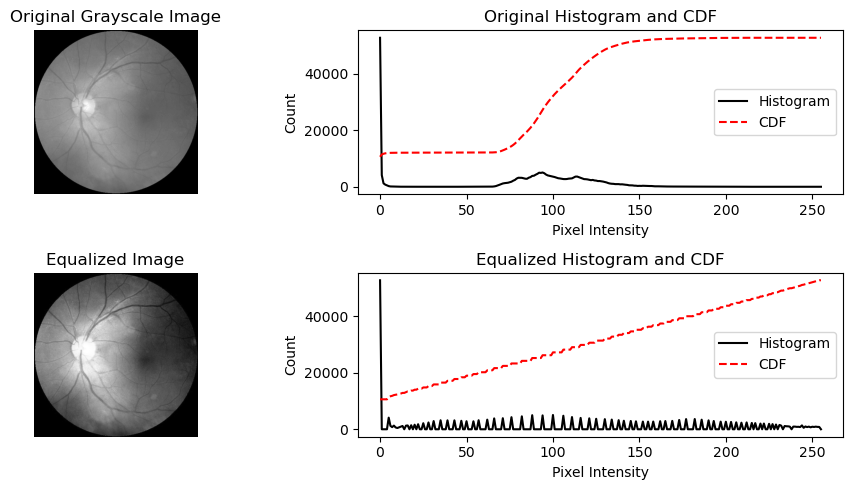

In [80]:
import cv2
import numpy as np

def qdhe(image, num_bins=256):
    # Step 1: Compute the histogram
    hist, bins = np.histogram(image.flatten(), num_bins, [0, num_bins])
    
    # Step 2: Partition the histogram into sub-histograms using median values
    sub_hist_limits = np.linspace(0, num_bins, 4)  # Example for 4 sub-histograms

    # Step 3: Clip the histogram if necessary
    clip_limit = 0.01  # 1% of the max value as the clip limit
    clipped_hist = np.clip(hist, 0, clip_limit * np.max(hist))

    # Step 4: Gray level range allocation
    new_gray_levels = np.linspace(0, num_bins-1, len(sub_hist_limits))

    # Step 5: Apply histogram equalization for each sub-histogram
    cdf = clipped_hist.cumsum()
    cdf_normalized = cdf * (new_gray_levels[-1] / cdf.max())
    equalized_image = np.interp(image.flatten(), bins[:-1], cdf_normalized)
    
    return equalized_image.reshape(image.shape)

processed_image_qdhe = qdhe(original_img)

# Original Image Histogram
hist_orig, bins_orig = np.histogram(original_img.flatten(), 256, [0, 256])
cdf_orig = hist_orig.cumsum()

# Equalized Image Histogram
hist_qdhe, bins_qdhe = np.histogram(processed_image_qdhe.flatten(), 256, [0, 256])
cdf_qdhe = hist_qdhe.cumsum()
cdf_qdhe_normalized = cdf_che * float(hist_qdhe.max()) / cdf_qdhe.max()



# Plotting the original image and its histogram with CDF
plt.figure(figsize=(10, 5))

# Display the original image
plt.subplot(2, 2, 1)
plt.imshow(original_img, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

# Display histogram and CDF for the original image
plt.subplot(2, 2, 2)
plt.plot(hist_orig, color='black', label='Histogram')
plt.plot(cdf_normalized, color='red', linestyle='--', label='CDF')
plt.title('Original Histogram and CDF')
plt.xlabel('Pixel Intensity')
plt.ylabel('Count')
plt.legend()

# Display the equalized image
plt.subplot(2, 2, 3)
plt.imshow(processed_image_qdhe, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

# Display histogram and CDF for the equalized image
plt.subplot(2, 2, 4)
plt.plot(hist_che, color='black', label='Histogram')
plt.plot(cdf_qdhe_normalized, color='red', linestyle='--', label='CDF')
plt.title('Equalized Histogram and CDF')
plt.xlabel('Pixel Intensity')
plt.ylabel('Count')
plt.legend()

plt.tight_layout()

print("Matrice de l'image originale:")
print(original_img)

print("\nMatrice de l'image égalisée:")
print(cdf_qdhe_normalized)


In [81]:
#  MSE entre l'image originale et l'image égalisée
mse_qdhe = calculate_mse(original_img, processed_image_qdhe)

# PSNR
psnr_qdhe = calculate_psnr(mse_qdhe)

# la SD de l'image égalisée
sd_qdhe = calculate_sd(processed_image_qdhe)

print("MSE:", mse_qdhe)
print("PSNR:", psnr_qdhe)
print("SD:", sd_qdhe)

MSE: 795.6083651100589
PSNR: 19.123810201736312
SD: 64.78318409538215


## <font color='green'>**Contrast limited adaptive histogram equalization, CLAHE**</font>

Matrice de l'image originale:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Matrice de l'image égalisée:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


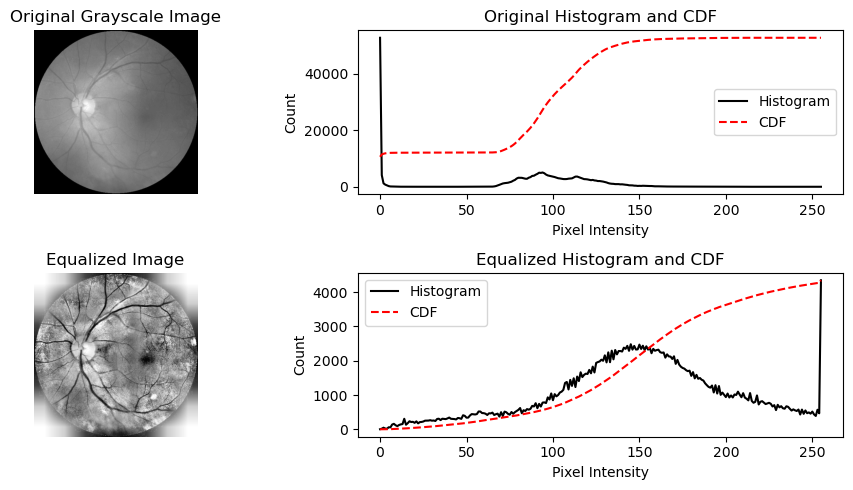

In [82]:
import cv2
import numpy as np

def apply_clahe(image, clip_limit=40, grid_size=(8, 8)):
    # Convert image to grayscale if it is not already
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Create a CLAHE object with specified clip limit and grid size
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=grid_size)
    
    # Apply CLAHE to the grayscale image
    clahe_img = clahe.apply(image)
    
    return clahe_img

def calculate_clip_limit(M, N, alpha, Smax):
    # Calculate the clip limit based on given formula
    beta = (1 + (alpha / 100)) * (M * N / Smax) - 1
    return beta


clip_factor = 3  # Clipping factor in percentage
Smax = 256  # Limited slope of the transformation function
M, N = original_img.shape[:2]  # Number of pixels in each region

# Calculate clip limit
clip_limit = calculate_clip_limit(M, N, clip_factor, Smax)

processed_image_clahe = apply_clahe(original_img, clip_limit=clip_limit, grid_size=(8, 8))

# Equalized Image Histogram
hist_clahe, bins_clahe = np.histogram(processed_image_clahe.flatten(), 256, [0, 256])
cdf_clahe = hist_clahe.cumsum()
cdf_clahe_normalized = cdf_clahe * float(hist_clahe.max()) / cdf_clahe.max()

# Plotting the original image and its histogram with CDF
plt.figure(figsize=(10, 5))

# Display the original image
plt.subplot(2, 2, 1)
plt.imshow(original_img, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

# Display histogram and CDF for the original image
plt.subplot(2, 2, 2)
plt.plot(hist_orig, color='black', label='Histogram')
plt.plot(cdf_normalized, color='red', linestyle='--', label='CDF')
plt.title('Original Histogram and CDF')
plt.xlabel('Pixel Intensity')
plt.ylabel('Count')
plt.legend()

# Display the equalized image
plt.subplot(2, 2, 3)
plt.imshow(processed_image_clahe, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

# Display histogram and CDF for the equalized image
plt.subplot(2, 2, 4)
plt.plot(hist_clahe, color='black', label='Histogram')
plt.plot(cdf_clahe_normalized, color='red', linestyle='--', label='CDF')
plt.title('Equalized Histogram and CDF')
plt.xlabel('Pixel Intensity')
plt.ylabel('Count')
plt.legend()

plt.tight_layout()

print("Matrice de l'image originale:")
print(original_img)

print("\nMatrice de l'image égalisée:")
print(processed_image_che)



In [83]:
#  MSE entre l'image originale et l'image égalisée
mse_clahe = calculate_mse(original_img, processed_image_clahe)

# PSNR
psnr_clahe = calculate_psnr(mse_clahe)

# la SD de l'image égalisée
sd_clahe = calculate_sd(processed_image_clahe)

print("MSE:", mse_clahe)
print("PSNR:", psnr_clahe)
print("SD:", sd_clahe)

MSE: 106.57685470581055
PSNR: 27.854174616647125
SD: 51.28187933133401


# comparaison


In [84]:
import pandas as pd

metrics_df = pd.DataFrame({
    'Method': ['HE', 'CHE', 'QDHE', 'CLAHE'],
    'MSE': [mse, mse_che, mse_qdhe, mse_clahe],
    'PSNR': [psnr, psnr_che, psnr_qdhe, psnr_clahe],
    'SD': [sd, sd_che, sd_qdhe, sd_clahe]
})

# Print the DataFrame
print(metrics_df)

  Method          MSE       PSNR         SD
0     HE  3901.015006  12.219027  66.752948
1    CHE    90.376003  28.570272  83.418278
2   QDHE   795.608365  19.123810  64.783184
3  CLAHE   106.576855  27.854175  51.281879


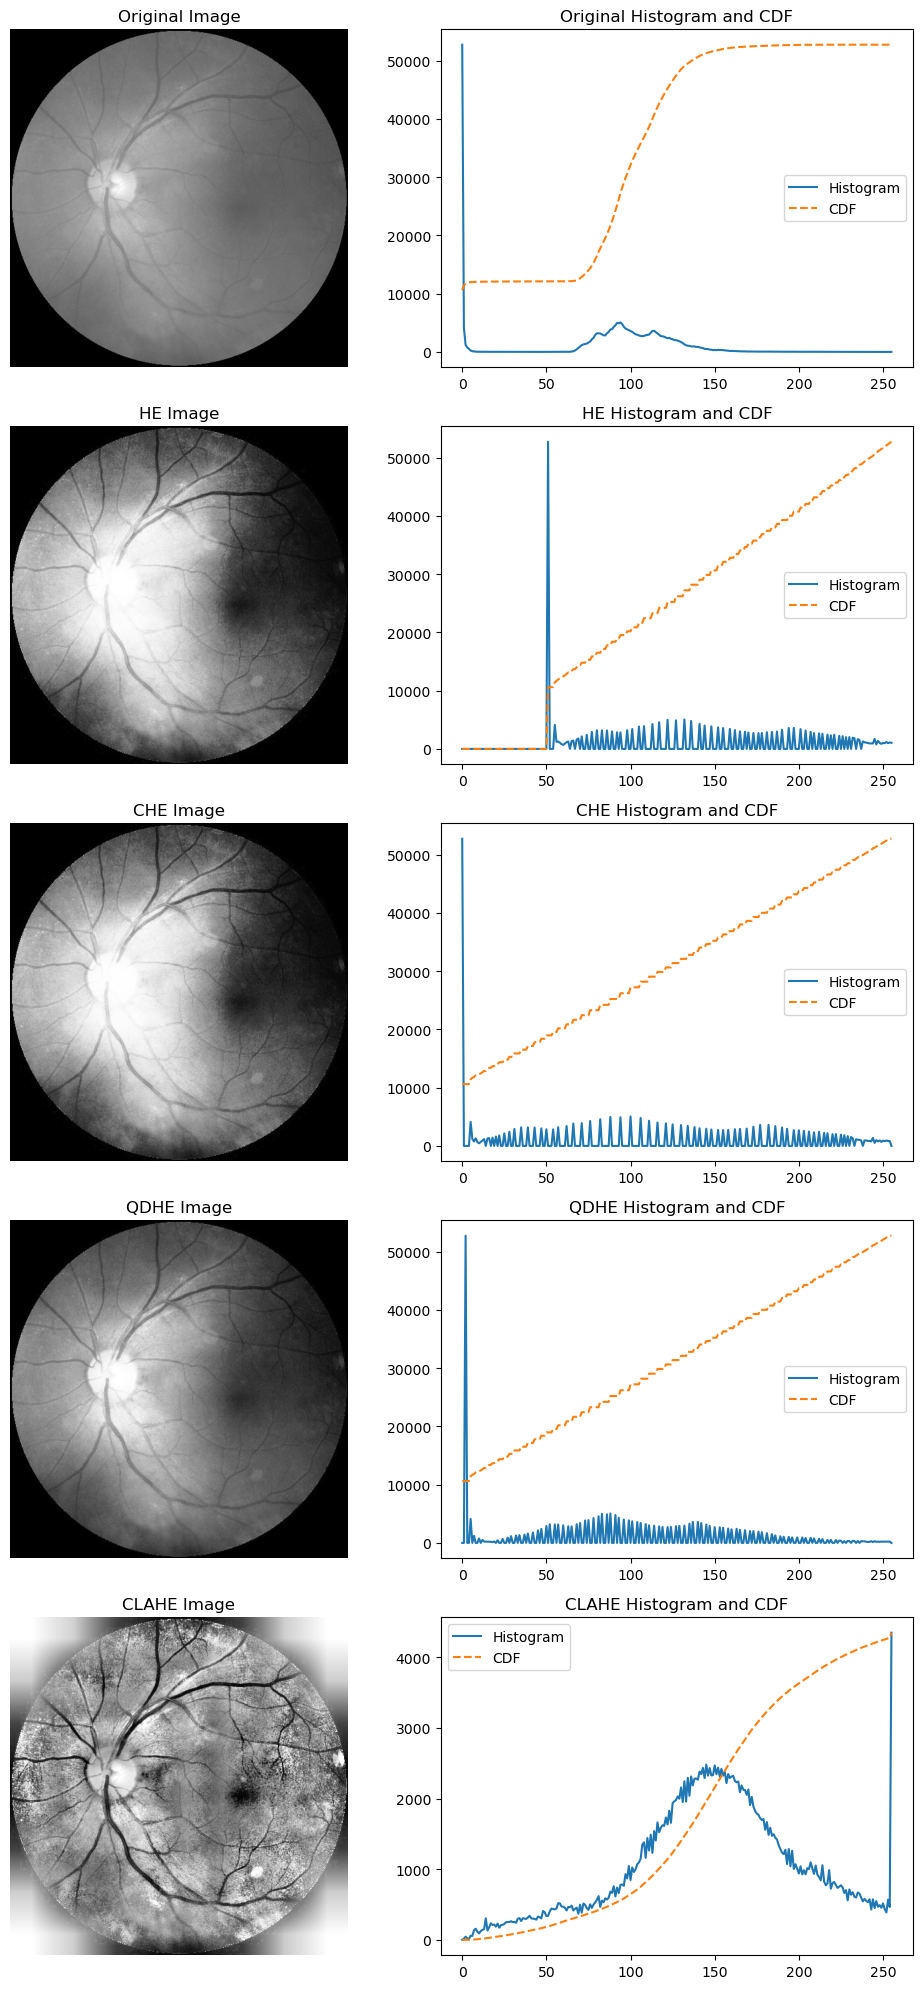

In [85]:
# Plotting
plt.figure(figsize=(10, 20))

# Original image and histogram/CDF
plt.subplot(5, 2, 1)
plt.imshow(original_img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(5, 2, 2)
plt.plot(hist_orig, label='Histogram')
plt.plot(cdf_normalized, label='CDF', linestyle='--')
plt.title('Original Histogram and CDF')
plt.legend()

# HE image and histogram/CDF
plt.subplot(5, 2, 3)
plt.imshow(processed_image_he, cmap='gray')
plt.title('HE Image')
plt.axis('off')

plt.subplot(5, 2, 4)
plt.plot(hist_he, label='Histogram')
plt.plot(cdf_he_normalized, label='CDF', linestyle='--')
plt.title('HE Histogram and CDF')
plt.legend()

# CHE image and histogram/CDF
plt.subplot(5, 2, 5)
plt.imshow(processed_image_che, cmap='gray')
plt.title('CHE Image')
plt.axis('off')

plt.subplot(5, 2, 6)
plt.plot(hist_che, label='Histogram')
plt.plot(cdf_che_normalized, label='CDF', linestyle='--')
plt.title('CHE Histogram and CDF')
plt.legend()

# QDHE image and histogram/CDF
plt.subplot(5, 2, 7)
plt.imshow(processed_image_qdhe, cmap='gray')
plt.title('QDHE Image')
plt.axis('off')

plt.subplot(5, 2, 8)
plt.plot(hist_qdhe, label='Histogram')
plt.plot(cdf_qdhe_normalized, label='CDF', linestyle='--')
plt.title('QDHE Histogram and CDF')
plt.legend()

# CLAHE image and histogram/CDF
plt.subplot(5, 2, 9)
plt.imshow(processed_image_clahe, cmap='gray')
plt.title('CLAHE Image')
plt.axis('off')

plt.subplot(5, 2, 10)
plt.plot(hist_clahe, label='Histogram')
plt.plot(cdf_clahe_normalized, label='CDF', linestyle='--')
plt.title('CLAHE Histogram and CDF')
plt.legend()

plt.tight_layout()
plt.show()

CHE seems to be the best method among the four in terms of balancing fidelity to the original image (low MSE) and perceived quality (high PSNR). It also enhances the image contrast to the highest degree (high SD). When contrast is too high, the grayscale values can become saturated, leading to a loss of detail in both the darker and brighter regions of an image. 

CLAHE, while not as effective as CHE in terms of MSE and PSNR, still performs significantly better than HE and QDHE. It also results in the least contrast enhancement, which can be beneficial. It showed the best results visually; preserving and enhancing original details